In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func


# import plot fuctions .py script
from rgb_against_time import *
from fig1code_Yuqing import *
from fig2code_Yuqing import *
from colorAnalysis import colorAnalysis
from genre_style_year import *

In [14]:
# read data
color_space = pd.read_csv('color_space.csv')

df = pd.read_csv('df.csv')
df.loc[df['Year'] > 1890, 'Year'] = 1889

df_reduced = pd.read_csv('df_reduced.csv')

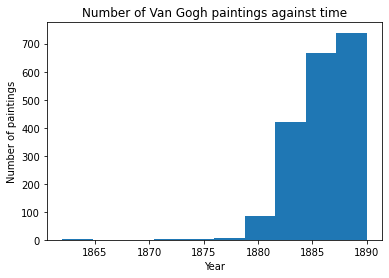

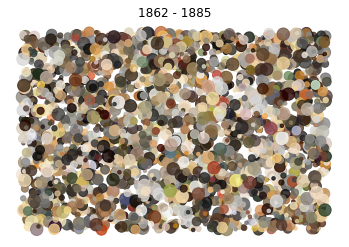

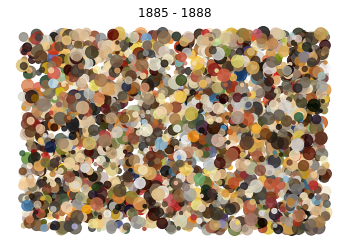

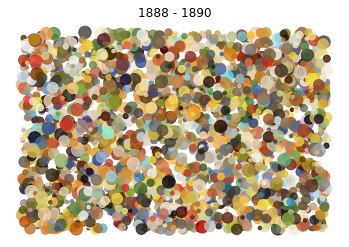

Text(0.5, 1.0, 'Average value of R/G/B/Luminance in Van Gogh Paintings across year')

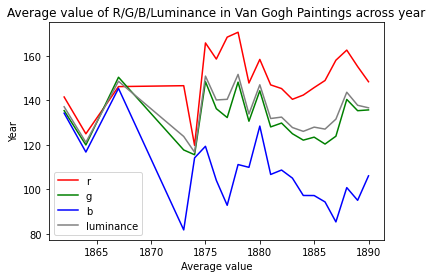

In [15]:
# Zeyun

# histogram
plt.hist(df["Year"])
plt.title("Number of Van Gogh paintings against time")
plt.xlabel("Year")
plt.ylabel("Number of paintings")


# scatter
c1 = get_colors_by_years(df, 1862, 1885)
c2 = get_colors_by_years(df, 1885, 1888)
c3 = get_colors_by_years(df, 1888, 1890)

plot_color_scatter(c1, 1862, 1885)
plot_color_scatter(c2, 1885, 1888)
plot_color_scatter(c3, 1888, 1890)



# line
# plot r/g/b/luminance against year
rs, gs, bs = [], [], []
lumi = []
years = []

for y in set(df['Year']):
    r,g,b = avg_color_by_year(df, y)
    l = compute_luminance(r, g, b)

    years.append(y)
    rs.append(r)
    gs.append(g)
    bs.append(b)
    lumi.append(l)
    
plt.plot(years, rs, color='r')
plt.plot(years, gs, color='g')
plt.plot(years, bs, color='b')
plt.plot(years, lumi, color='gray')

plt.legend(['r', 'g', 'b', 'luminance'])
plt.ylabel('Year')
plt.xlabel('Average value')
plt.title('Average value of R/G/B/Luminance in Van Gogh Paintings across year')

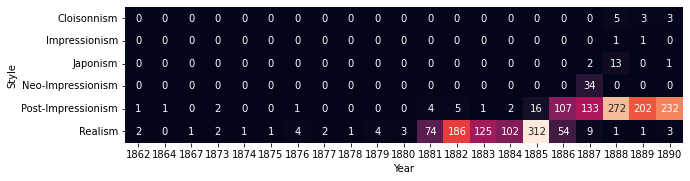

In [16]:
# Yuqing Shen

plotstyleyear()

total: 9655
830
total: 9655
201
total: 9655
49
17
{'sketch and study', 'vanitas', 'self-portrait', 'animal painting', 'flower painting', 'panorama', 'genre painting', 'religious painting', 'marina', 'landscape', 'cityscape', 'interior', 'portrait', 'nude painting (nu)', 'still life', 'cloudscape', 'figurative'}
sketch and study:56
vanitas:13
self-portrait:39
animal painting:69
flower painting:67
panorama:14
genre painting:56
religious painting:20
marina:32
landscape:25
cityscape:58
interior:53
portrait:58
nude painting (nu):46
still life:47
cloudscape:5
figurative:5
6
{'Japonism', 'Cloisonnism', 'Neo-Impressionism', 'Realism', 'Post-Impressionism', 'Impressionism'}
Japonism:70
Cloisonnism:51
Neo-Impressionism:141
Realism:54
Post-Impressionism:39
Impressionism:10


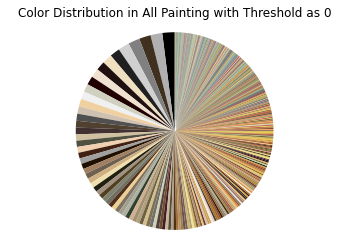

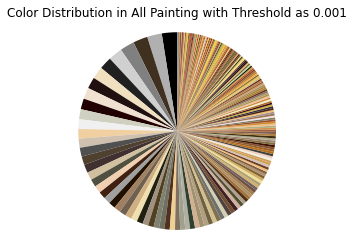

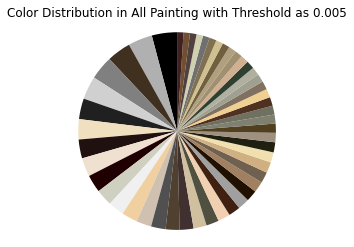

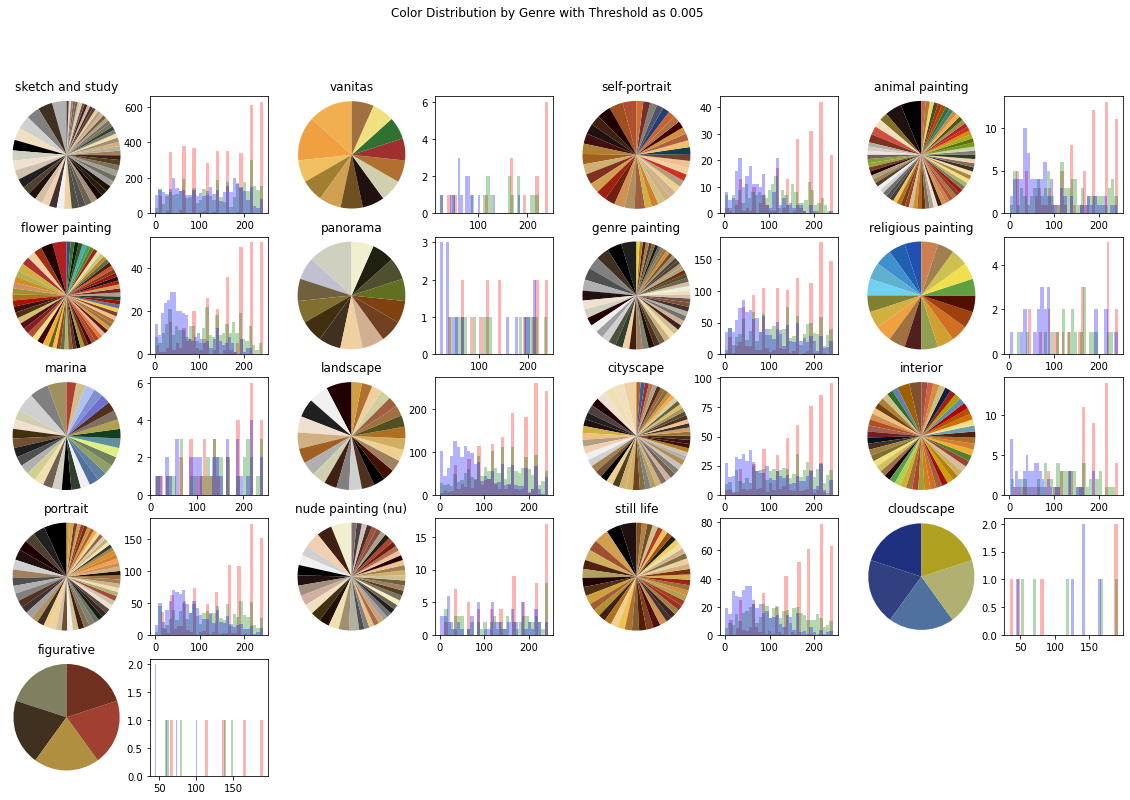

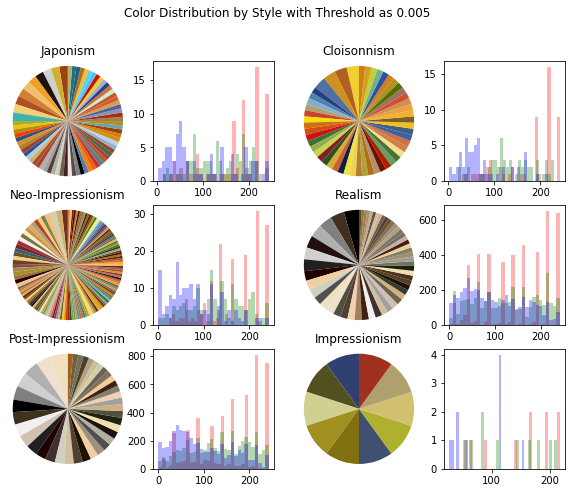

In [17]:
# Pai Tong
colorAnalysis()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


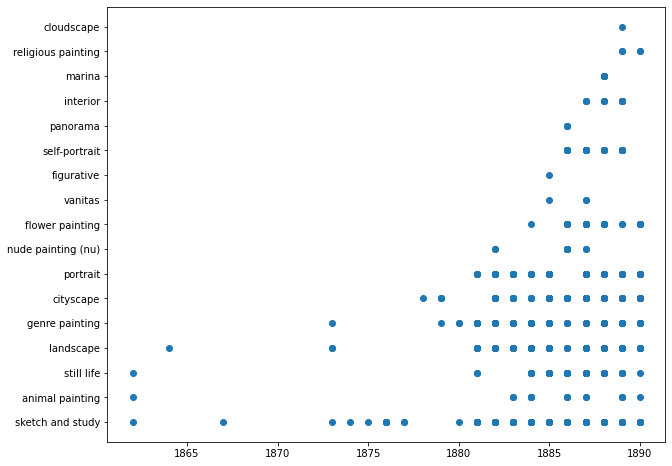

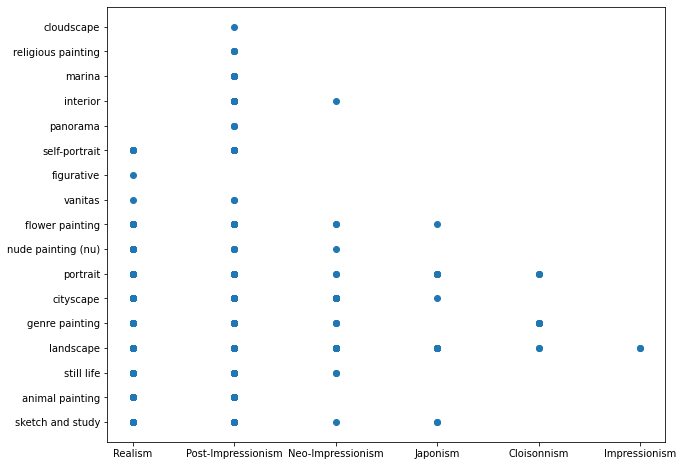

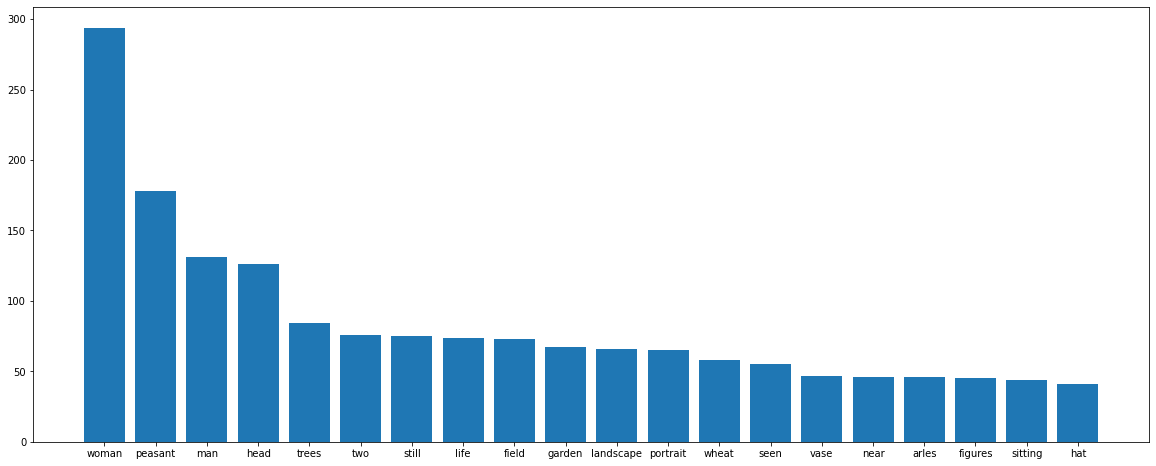

In [32]:
# Zhenqi Li
# top 20 themse
def top_themes():
  '''
  This function return a plot showing the top 20 themes of Van Gogh's favourite
  '''
  dfnew = pd.read_csv('df_reduced.csv')
  dfnew = dfnew.drop(dfnew[dfnew.Year>2022].index)
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  swords = stopwords.words('english')
  name_map = {}
  for name in dfnew['Name']:
    for s in name.split(' '):
      s = s.lower()
      s = s.strip(',')
      if s in name_map and s not in swords:
        name_map[s] = name_map[s] + 1
      elif s not in name_map and s not in swords:
        name_map[s] = 1
  name_sorted_list = (sorted(name_map.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))
  plt.figure(figsize=(20,8))
  x1 = list(x[0] for x in name_sorted_list)[:20]
  y1 = list(x[1] for x in name_sorted_list)[:20]
  plt.bar(x1,y1)
  plt.show()
# relationship between genre and style
def genre_style():
  df = pd.read_csv('df.csv')
  df = df.drop(df[df.Year>2022].index)
  plt.figure(figsize=(10,8))
  plt.scatter(df['Style'], df['Genre'])

def genre_year():
  df = pd.read_csv('df.csv')
  df = df.drop(df[df.Year>2022].index)
  plt.figure(figsize=(10,8))
  plt.scatter(df['Year'], df['Genre'])

genre_year()
genre_style()
top_themes()

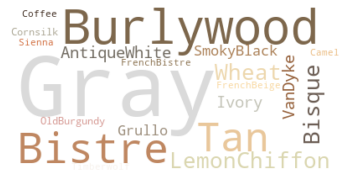

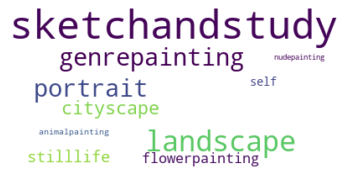

In [19]:
# JuiYu
# generating word clouds
class SimpleGroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


def generate_word_cloud_colors(df):
    ls = df['Colors'].to_list()
    w_ls = ''
    c_dict = {}
    for l in ls:
        l = l.replace('(', '').replace(')', '').split(',')
        for c in l:
            c = c.replace('\'', '').replace(' ', '')
            w_ls += " " + c
            if c not in c_dict:
                c_dict[c] = 0
            c_dict[c] += 1
    wc = WordCloud(max_font_size=100, max_words=20, background_color="white", collocations=False).generate(w_ls)
    color_to_words = {
        # words below will be colored with a green single color function
        # will be colored with a red single color function
        '#A9A9A9': ['Gray'],
        '#D2B48C' : ['Tan'],
        '#A0522D' : ['Sienna'],
        '#43302e' : ['OldBurgundy'],
        '#c19a6b' : ['Camel'],
        '#6f4e37' : ['Coffee'],
        '#fffacd' : ['LemonChiffon'],
        '#faebd7' : ['AntiqueWhite'],
        '#deb887' : ['Burlywood'],
        '#664228' : ['VanDyke'],
        '#FFFFF0' : ['Ivory'],
        '#3d2b1f' : ['Bistre'],
        '#856d4d' : ['FrenchBistre'],
        '#a99a86' : ['Grullo'],
        '#c8ad7f' : ['FrenchBeige'],
        '#f5deb3' : ['Wheat'],
        '#F2D2BD' : ['Bisque'],
        '#fff8dc' : ['Cornsilk'],
        '#dbd7d2' : ['Timberwolf'],
        '#100c08' : ['SmokyBlack'],
        '#ffffe0' : ['LightYellow']
    }
    default_color = '#f5deb3'

    # Create a color function with multiple tones
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    # Apply our color function
    wc.recolor(color_func=grouped_color_func)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('WordCloud.png')
    plt.show()

def generate_word_cloud_genre(df):
    g_ls = ""
    g_dict = {}
    for g in df['Genre']:
        if g not in g_dict:
            g_dict[g] = 0
        g_dict[g] += 1
        g = g.replace(' ', '')
        g_ls += " " + g

    wc = WordCloud(max_font_size=100, max_words=10, background_color="white", collocations=False).generate(g_ls)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('Genre.png')
    plt.show()
    
df = pd.read_csv('df_reduced.csv')
generate_word_cloud_colors(df)
generate_word_cloud_genre(df)
